In [2]:

from sklearn.datasets import load_breast_cancer
import pandas as pd
#load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df)
print(df.columns)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [3]:
P_true = df ['mean radius']
print(P_true)

0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: mean radius, Length: 569, dtype: float64


In [7]:

def compute_perimeter(r):
  output = 3.14*2*r
  return(output)

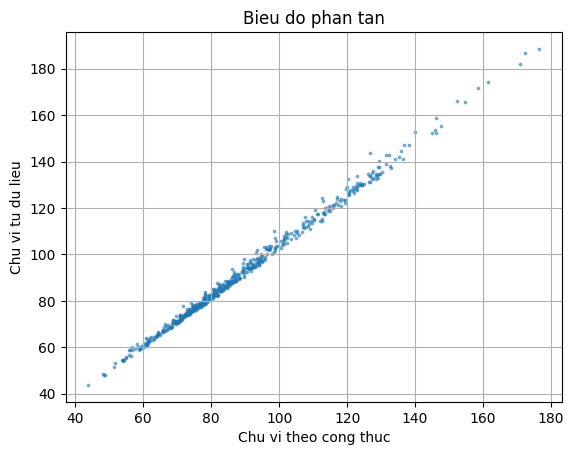

In [8]:
# Định nghĩa r là bán kính trung bình
r = df['mean radius']
P = compute_perimeter(r)
P_true = df['mean perimeter']

import matplotlib.pyplot as plt 
figure = plt.scatter(x=P, y=P_true, alpha=0.5, s=3)
plt.xlabel('Chu vi theo cong thuc')
plt.ylabel('Chu vi tu du lieu')
plt.title('Bieu do phan tan')
plt.grid(True)
plt.savefig('example_1.png', dpi=300)
plt.show()

# Hồi quy tuyến tính

Công thức chu vi hình tròn:

$$
\text{Perimeter} = 2\pi R
$$

Giả sử có tập dữ liệu \( D(x, y) \), ta cần tìm hàm hồi quy 
\( \hat{Y} = f(X) \).

## Dạng hồi quy tuyến tính đơn

$$
\hat{Y} = aX + b
$$

Trong đó:

- \( X \) là biến số (biến đầu vào)
- \( a, b \) là các tham số (hệ số góc và hệ số chặn)

## Một số biến thể

### Hồi quy bậc hai:

$$
\hat{Y} = aX^2
$$

### Hàm mũ:

$$
\hat{Y} = X \cdot e^a
$$


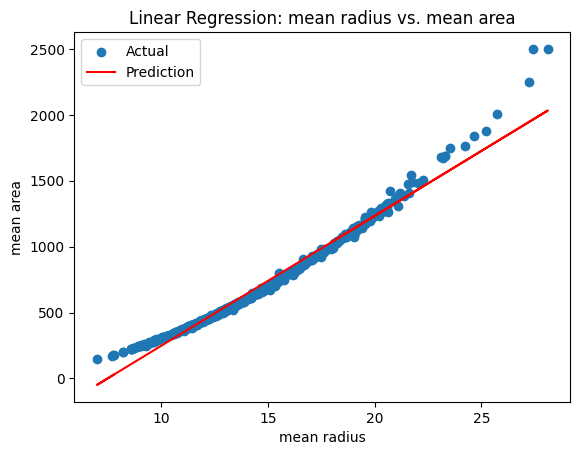

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df[['mean radius']]
y = df['mean area']
# Kiểm tra dữ liệu
if len(X) > 0 and len(y) > 0:
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.scatter(X, y, label='Actual')
    plt.plot(X, y_pred, color='red', label='Prediction')
    plt.title("Linear Regression: mean radius vs. mean area")
    plt.xlabel("mean radius")
    plt.ylabel("mean area")
    plt.legend()
    plt.show()

## Mô hình lũy thừa (Power-law Regression)

Dạng tổng quát:

$$
\text{mean area} = a \cdot (\text{mean radius})^b
$$

Trong đó:

- \( a \) và \( b \) là các tham số cần ước lượng từ dữ liệu
- \( \text{mean radius} \) là biến đầu vào (biến độc lập)
- \( \text{mean area} \) là biến đầu ra (biến phụ thuộc)

Đây là một dạng hồi quy phi tuyến vì mối quan hệ giữa các biến là theo hàm mũ (không phải tuyến tính).


### Tuyến tính hóa mô hình (log-log)

Lấy logarit hai vế:

$$
\log(\text{mean area}) = \log(a) + b \cdot \log(\text{mean radius})
$$

Gọi:

- \( Y = \log(\text{mean area}) \)
- \( X = \log(\text{mean radius}) \)
- \( A = \log(a) \)

Ta được phương trình hồi quy tuyến tính:

$$
Y = A + bX
$$

Sau khi hồi quy, có thể tính lại:

$$
a = e^A
$$


## Mô hình hồi quy phi tuyến

Trong khi hồi quy tuyến tính giả định mối quan hệ giữa \( X \) và \( Y \) là tuyến tính (dạng đường thẳng), **hồi quy phi tuyến** mô tả các mối quan hệ phức tạp hơn.

Một số dạng mô hình hồi quy phi tuyến thường gặp:

### 1. Hồi quy bậc hai (đa thức bậc hai)

$$
\hat{Y} = aX^2 + bX + c
$$

### 2. Hồi quy bậc ba (đa thức bậc ba)

$$
\hat{Y} = aX^3 + bX^2 + cX + d
$$

### 3. Hồi quy mũ

$$
\hat{Y} = ae^{bX}
$$

### 4. Hồi quy logarit

$$
\hat{Y} = a \ln(X) + b
$$

### 5. Hồi quy logistic (S-curve)

$$
\hat{Y} = \frac{L}{1 + e^{-k(X - X_0)}}
$$

Trong đó:

- \( a, b, c, d, L, k, X_0 \) là các tham số cần học từ dữ liệu.
- \( e \) là hằng số Euler (khoảng 2.718).
- \( \ln \) là logarit tự nhiên.

---

Mô hình hồi quy phi tuyến thường được dùng khi dữ liệu có xu hướng cong, không phù hợp với mô hình tuyến tính thông thường.


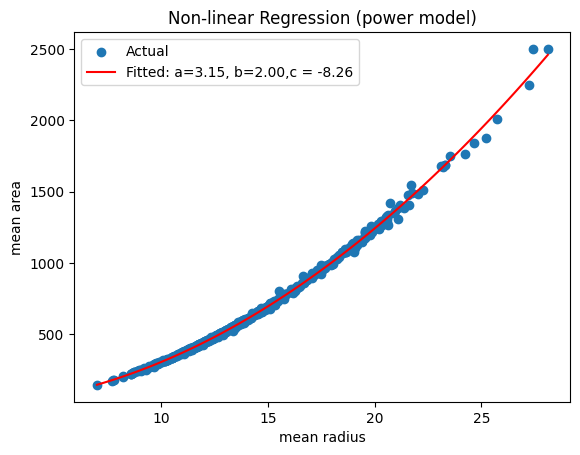

In [19]:
import numpy as np
from scipy.optimize import curve_fit

def power_func(x, a, b, c):
    return a * np.power(x, b)+c
#a * x^b

x_data = df['mean radius'].values
y_data = df['mean area'].values

# Ước lượng tham số
params, _ = curve_fit(power_func, x_data, y_data)
a, b, c = params

# Dự đoán và vẽ kết quả
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = power_func(x_fit, a, b, c)

plt.scatter(x_data, y_data, label='Actual')
plt.plot(x_fit, y_fit, 'r-', label=f'Fitted: a={a:.2f}, b={b:.2f},c = {c:.2f}')
plt.title("Non-linear Regression (power model)")
plt.xlabel("mean radius")
plt.ylabel("mean area")
plt.legend()
plt.show()

## Phân loại ung thư bằng hồi quy logistic

Trong bài toán phân loại nhị phân (binary classification), chẳng hạn như **phân loại ung thư**:

- `malignant` (ác tính) được gán nhãn: **0**
- `benign` (lành tính) được gán nhãn: **1**

Ta sử dụng **hồi quy logistic** để ước lượng xác suất một mẫu thuộc lớp `benign`.

### Mô hình hồi quy logistic

Hàm dự đoán xác suất có dạng:

$$
P(Y = 1 \mid X) = \hat{Y} = \frac{1}{1 + e^{-(aX + b)}}
$$

Trong đó:

- \( X \): giá trị đặc trưng (hoặc vector đặc trưng nhiều chiều)
- \( a, b \): tham số của mô hình cần học
- \( \hat{Y} \): xác suất mẫu thuộc lớp `benign` (1)

### Quy tắc phân loại

- Nếu \( \hat{Y} \geq 0.5 \) → dự đoán `benign` (1)
- Nếu \( \hat{Y} < 0.5 \) → dự đoán `malignant` (0)

### Giải thích

- Mô hình logistic giúp ánh xạ giá trị đầu ra thành xác suất nằm trong khoảng từ 0 đến 1.
- Hàm sigmoid:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

giúp chuyển mô hình tuyến tính \( z = aX + b \) sang xác suất.

---

Hồi quy logistic là phương pháp nền tảng cho nhiều bài toán phân loại y tế, đặc biệt khi đầu ra chỉ gồm hai lớp.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features = ['mean radius', 'mean texture', 'mean area']
X = df[features]
df['target'] = np.random.randint(0,2, size=len(df)) # Tạo nhãn ngẫu nhiên cho ví dụ
y = df['target']

# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Huấn luyện mô hình
#clf:classification
# LogisticRegression: hồi quy logistic
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Đánh giá
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Kiểm tra phân loại sai
wrong = 0
for i in range(len(y_test)):
    if y_test.values[i] != y_pred[i]:
        wrong += 1
print("Số mẫu phân loại sai:", wrong)

Accuracy: 0.5789473684210527
Số mẫu phân loại sai: 48


In [24]:
y_pred_train = clf.predict(X_train)
print(f'Train accuracy: {accuracy_score(y_train, y_pred_train):.2f}')

Train accuracy: 0.55


# Quiz 6: Phân phối của Mean Area và Ước lượng tham số cho Phân phối Chuẩn

## 1. Kiểm tra phân phối của `mean area`

Giả sử ta có một tập dữ liệu với biến đặc trưng `mean area` (diện tích trung bình của khối u). Trước tiên, ta kiểm tra xem biến này có tuân theo **phân phối chuẩn (normal distribution)** hay không.

### Các bước kiểm tra:

- **Vẽ histogram** hoặc **biểu đồ mật độ (density plot)**
- **Kiểm định Shapiro-Wilk**, **Anderson-Darling**, hoặc **Kolmogorov-Smirnov** để kiểm tra tính chuẩn

Nếu `mean area` có dạng gần chuẩn, ta có thể ước lượng các tham số của phân phối chuẩn.

---

## 2. Ước lượng tham số cho phân phối chuẩn

Phân phối chuẩn có dạng:

$$
X \sim \mathcal{N}(\mu, \sigma^2)
$$

Trong đó:

- \( \mu \) là **trung bình (mean)**
- \( \sigma^2 \) là **phương sai (variance)**  
- \( \sigma \) là **độ lệch chuẩn (standard deviation)**

### Ước lượng từ mẫu:

Giả sử ta có một mẫu dữ liệu \( x_1, x_2, \ldots, x_n \), khi đó:

- Trung bình mẫu:

$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

- Độ lệch chuẩn mẫu (MLE):

$$
\hat{\sigma} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{\mu})^2 }
$$

(Nếu dùng ước lượng không chệch: chia cho \( n - 1 \) thay vì \( n \))

---

## 3. Áp dụng thực tế

Sau khi ước lượng \( \mu \) và \( \sigma \), ta có thể:

- Dùng để tạo phân phối chuẩn mô phỏng
- Tính xác suất (ví dụ: \( P(X > 1000) \))
- Chuẩn hóa dữ liệu: \( Z = \frac{X - \mu}{\sigma} \)

---

Phân phối chuẩn là nền tảng trong thống kê và học máy, giúp chuẩn hóa dữ liệu, kiểm định giả thuyết và xây dựng các mô hình xác suất.


In [28]:
x_rand_uniform = np.random.uniform(0,1,10000)
print(x_rand_uniform)

[0.9422683  0.93027006 0.75484702 ... 0.06743949 0.01501351 0.07825507]


In [34]:
#phân phối chuẩn
x_rand_normal= np.random.normal(7,1,1000)
print(x_rand_normal)

[8.55656739 8.00266996 7.12527782 6.57654673 4.44092081 8.09455265
 8.8961276  7.09962616 6.56714392 6.18916429 7.77382742 7.06908347
 7.10704185 7.81067098 6.39212144 6.52994131 6.33118364 9.18451746
 4.76561175 8.2399042  6.80254365 4.95775098 7.89648721 7.18183056
 6.2077052  6.63821511 7.72083707 7.88676105 4.66768545 8.43709417
 7.52961128 6.92265242 7.79005707 6.67651429 7.15940801 7.07733587
 6.61487861 7.47286401 7.40499108 6.48907111 7.09118609 5.60061233
 7.39505646 8.17815065 6.13878279 8.02244027 6.16621582 7.60631447
 6.61481614 6.95318421 8.92120961 6.83924849 5.62064999 6.73821507
 5.71528232 9.03166292 6.89020287 7.35133186 7.32556493 6.35507678
 6.60830733 6.83014455 7.63029325 6.68510961 6.84736609 7.30665718
 7.38335692 6.72870005 5.80779267 6.44308702 5.67822403 6.96467641
 7.38439868 6.40796937 7.98566588 6.54068427 6.59982455 6.38772309
 6.57224526 7.87305019 5.60601098 5.4545713  6.19239493 6.08062805
 6.24509632 5.92652276 7.4208437  8.27883245 6.45717722 7.3165

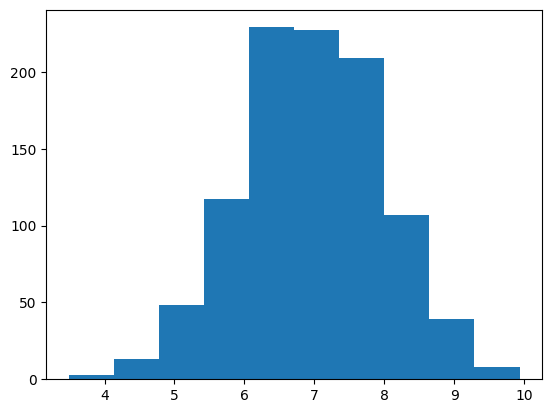

In [35]:
fit=plt.hist(x_rand_normal)

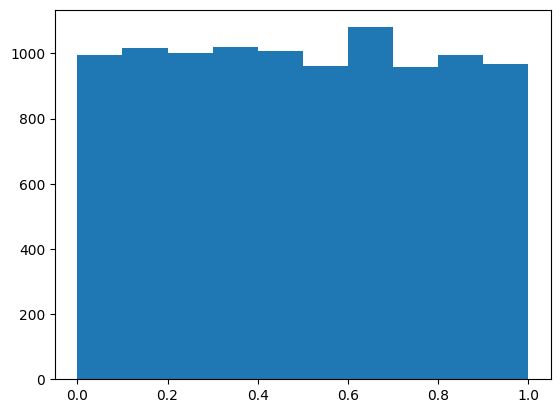

In [29]:
fig=plt.hist(x_rand_uniform)

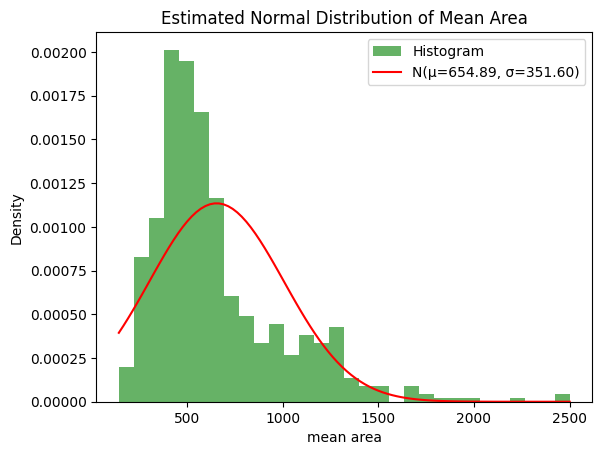

In [ ]:
from scipy.stats import norm

mean_area = df['mean area']
mu, std = norm.fit(mean_area)
'''
 Dòng này sử dụng scipy.stats.norm.fit() để ước lượng tham số phân phối chuẩn:
μ (mean) ≈ 654.89
σ (std) ≈ 351.60
'''
# Histogram + PDF
x = np.linspace(min(mean_area), max(mean_area), 100)
pdf = norm.pdf(x, mu, std)

plt.hist(mean_area, bins=30, density=True, alpha=0.6, color='g', label='Histogram')
plt.plot(x, pdf, 'r-', label=f'N(μ={mu:.2f}, σ={std:.2f})')
plt.title("Estimated Normal Distribution of Mean Area")
plt.xlabel("mean area")
plt.ylabel("Density")
plt.legend()
plt.show()
'''Histogram màu xanh: mô tả tần suất xuất hiện của các giá trị mean area thực tế.

Đường cong đỏ: phân phối chuẩn 

N(654.89,351.602) ước lượng từ dữ liệu.

So sánh:

Histogram lệch phải rõ rệt → phân phối không chuẩn hoàn toàn

Đường chuẩn không khớp hoàn hảo → nên xem xét dùng biến đổi logarit hoặc hồi quy phi tuyến thay vì giả định phân phối chuẩn.'''

tạo y-x_rand_uniform và y-x_rand_normal
plot scatter (x_rand_uniform, y_rand_uniform) va (x_rand_normal, y_rand_normal)

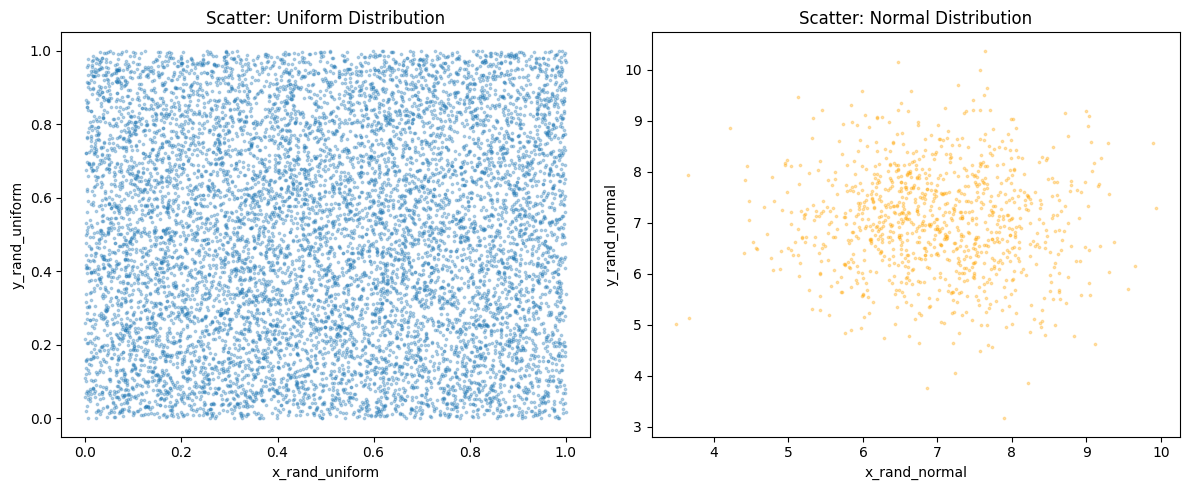

In [36]:

np.random.seed(42)
y_rand_uniform = np.random.uniform(0, 1, 10000)
y_rand_normal = np.random.normal(7, 1, 1000)

# Vẽ scatter plot cho phân phối đều
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(x_rand_uniform, y_rand_uniform, alpha=0.3, s=3)
plt.title('Scatter: Uniform Distribution')
plt.xlabel('x_rand_uniform')
plt.ylabel('y_rand_uniform')

# Vẽ scatter plot cho phân phối chuẩn
plt.subplot(1,2,2)
plt.scatter(x_rand_normal, y_rand_normal, alpha=0.3, s=3, color='orange')
plt.title('Scatter: Normal Distribution')
plt.xlabel('x_rand_normal')
plt.ylabel('y_rand_normal')

plt.tight_layout()
plt.show()


mcmc sampling